# **INTEGRANTES:  SAMUEL GIRALDO BUILES - JUAN ESTEBAN BERRIO SALAZAR**

In [ ]:
import pandas as pd

**PUNTO 1**

In [ ]:
path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTWsahNju_LTtJBjuaaILBx_3QutbzK-HCjGoLtrtcIBEu4rOQgdiz17AD8SDa13g/pub?output=csv"

In [34]:
def punto1(path):
  df = pd.read_csv(path)
  del df["Date"]
  del df["Unnamed: 1"]
  #Los datos que se piden en el diccionario
  cantidad_columnas = len(df.columns)
  nombre_columnas = df.columns
  tf = pd.isnull(df["Brebeuf"])
  cantidad_columnasnoNaN = len(df[~tf])
  memoria_usada = df.memory_usage()
  info_df = df.describe()
  desviacion_std = info_df.loc["std"]
  media = info_df.loc["mean"]
  maximo = info_df.loc["max"]
  minimo = info_df.loc["min"]
  #######
  #Cambiar los nan por none. Esta parte no se ve en el return de la funcion pero igual se aplica.
  i = 0
  while i < len(df):
    x = df.loc[i,"Brebeuf"]
    if str(x) == "nan":
      df.loc[i,"Brebeuf"] = "none"
    if x == 0:
      df.loc[i,"Brebeuf"] = "0"
    i = i+1
  #######
  dic = {"cantidad_columnas" : cantidad_columnas,
           "nombre_columnas" : nombre_columnas, 
    "cantidad_columnasnoNaN" : cantidad_columnasnoNaN,
             "memoria_usada" : memoria_usada,
            "desviacion_std" : desviacion_std,
                     "media" : media,
                    "maximo" : maximo,
                    "minimo" : minimo}
  return(dic)


In [35]:
punto1(path)

{'cantidad_columnas': 4,
 'cantidad_columnasnoNaN': 178,
 'desviacion_std': Berri1           1878.879799
 Maisonneuve_1    1079.533086
 Maisonneuve_2    1854.368523
 Brebeuf          2484.004743
 Name: std, dtype: float64,
 'maximo': Berri1           6626.0
 Maisonneuve_1    4242.0
 Maisonneuve_2    6587.0
 Brebeuf          7575.0
 Name: max, dtype: float64,
 'media': Berri1           2032.200000
 Maisonneuve_1    1060.252055
 Maisonneuve_2    2093.169863
 Brebeuf          2576.359551
 Name: mean, dtype: float64,
 'memoria_usada': Index             128
 Berri1           2920
 Maisonneuve_1    2920
 Maisonneuve_2    2920
 Brebeuf          2920
 dtype: int64,
 'minimo': Berri1           0.0
 Maisonneuve_1    0.0
 Maisonneuve_2    0.0
 Brebeuf          0.0
 Name: min, dtype: float64,
 'nombre_columnas': Index(['Berri1', 'Maisonneuve_1', 'Maisonneuve_2', 'Brebeuf'], dtype='object')}

**PUNTO 2** (Aquí utilizamos la documento de "crimenes" que estaba en la carpeta "data" (el cual ya tiene eliminadas varias columnas), pues el documento "Crimes_-_2019.csv" no nos carga desde colab)

In [36]:
import seaborn as sns

In [37]:
link = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQqCpt9ad3JYNclQrdwHtqJVnMlMyNHI-p176ceLZSIZxK9aacD5xaCE3M5oItoTQOjsgm7aEXXW-V0/pub?output=csv"

In [40]:
def punto2(link):
  pf = pd.read_csv(link)
  pf.Date = pd.to_datetime(pf.Date,format="%m/%d/%Y %I:%M:%S %p")#Transformar str a tipo fecha
  datos_info = pf.groupby("Primary Type").Date.count().sort_values() #Cosas totales para cada tipo de crimen, ordenados en forma descendente
  datos_info = datos_info.reset_index() # Resetear los indices
  sorted(datos_info["Primary Type"]) # Datos en orden alfabetico, no reasignamos esto porque en la grafica se ve mejor en orden descendente de numeros
  print(pf[100:120])#Mostrar de la fila 100 a la 120
  datos_info = datos_info.rename(columns={"Date":"Contador"})#Renombrar el nombre de una colmna
  ax = sns.barplot(x = "Contador", y="Primary Type", data = datos_info)#Grafico
  return(ax)

     Unnamed: 0                      Primary Type                Date
100         100  INTERFERENCE WITH PUBLIC OFFICER 2019-10-13 22:34:00
101         101                     OTHER OFFENSE 2019-10-13 14:02:00
102         102                           BATTERY 2019-10-13 13:21:00
103         103                             THEFT 2019-04-03 09:15:00
104         104                           BATTERY 2019-10-13 00:26:00
105         105                DECEPTIVE PRACTICE 2019-10-13 09:26:00
106         106                DECEPTIVE PRACTICE 2019-10-13 15:00:00
107         107                           BATTERY 2019-10-13 01:50:00
108         108                             THEFT 2019-10-04 00:56:00
109         109                           BATTERY 2019-10-13 21:31:00
110         110                             THEFT 2019-10-13 20:00:00
111         111                          BURGLARY 2019-10-13 07:00:00
112         112                   CRIMINAL DAMAGE 2019-10-13 09:30:00
113         113     

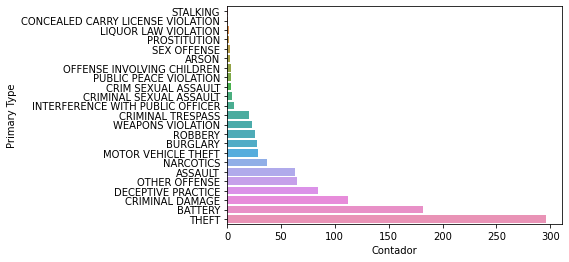

In [41]:
punto2(link)

**PUNTO 3(Este punto no lo realizamos como una "funcion")**


In [42]:
import matplotlib.pyplot as plt


In [43]:
that = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSJ7bFjFQu-VmuwebbH0vrg8a3b168p6aTsglLbMISvmgYmg9yGT6mPdlAUVeBl1lU1Cxnj9wtNxghu/pub?output=csv"
gf = pd.read_csv(that)

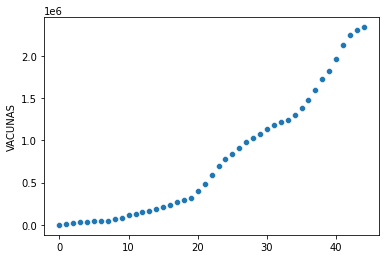

In [64]:
tf = gf["country"] == "Colombia" #Mascara (Los filas de countru que tienen " colombia " se renombran como "true")
colombia = gf[tf] #Se filtran solo los datos de Colombia
colombia_1 = colombia #Esto es para guardar unos datos y hacer un filtro en el ultimo punto
colombia.to_csv("colombiavacunas.csv")#Se crea un .csv con los datos de colombia
colombia = colombia.reset_index()
colombia = colombia.rename(columns={"total_vaccinations":"VACUNAS"}) #Cambio de nombre
#GRAFICO
plt.figure()
sns.scatterplot(data = colombia, x = colombia.index, y = "VACUNAS")
plt.show()

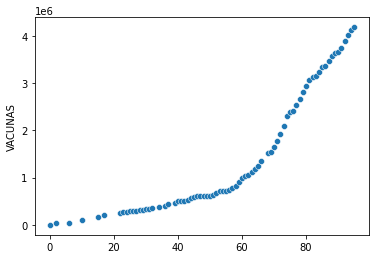

In [48]:
#Ahora veamos como son las vacunas en argentina
tf_1 = gf["country"] == "Argentina" 
argentina = gf[tf_1] 
argentina = argentina.reset_index()
argentina = argentina.rename(columns={"total_vaccinations":"VACUNAS"})
#GRAFICO
plt.figure()
sns.scatterplot(data = argentina, x = argentina.index, y = "VACUNAS")
plt.show()

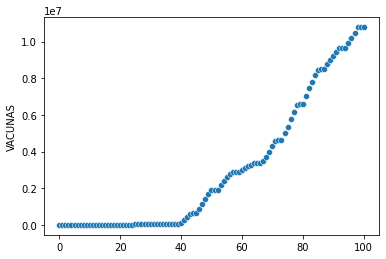

In [50]:
#Ahora veamos como son las vacunas en Chile
tf_2 = gf["country"] == "Chile" 
chile = gf[tf_2] 
chile = chile.reset_index()
chile = chile.rename(columns={"total_vaccinations":"VACUNAS"})
#GRAFICO
plt.figure()
sns.scatterplot(data = chile, x = chile.index, y = "VACUNAS")
plt.show()

In [65]:
#Ahora Realicemos la mascara con para el filtro pedido en Colombia
tf_3= (colombia_1["total_vaccinations"]>1.5E6) & (colombia_1["total_vaccinations"]<2.0E6)
colombia_1 = colombia_1[tf_3]
print(colombia_1)

       country  ...                                     source_website
1878  Colombia  ...  https://www.minsalud.gov.co/salud/publica/Vacu...
1879  Colombia  ...  https://www.minsalud.gov.co/salud/publica/Vacu...
1880  Colombia  ...  https://www.minsalud.gov.co/salud/publica/Vacu...
1881  Colombia  ...  https://www.minsalud.gov.co/salud/publica/Vacu...

[4 rows x 15 columns]


In [57]:
colombia

,index,country,iso_code,date,VACUNAS,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,1841,Colombia,COL,2021-02-17,18.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
1,1842,Colombia,COL,2021-02-18,9935.0,NaN,NaN,9917.0,9917.0,0.02,NaN,NaN,195.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
2,1843,Colombia,COL,2021-02-19,21307.0,NaN,NaN,11372.0,10644.0,0.04,NaN,NaN,209.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
3,1844,Colombia,COL,2021-02-20,33140.0,NaN,NaN,11833.0,11041.0,0.07,NaN,NaN,217.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
4,1845,Colombia,COL,2021-02-21,39827.0,NaN,NaN,6687.0,9952.0,0.08,NaN,NaN,196.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
5,1846,Colombia,COL,2021-02-22,45166.0,NaN,NaN,5339.0,9030.0,0.09,NaN,NaN,177.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
6,1847,Colombia,COL,2021-02-23,48150.0,NaN,NaN,2984.0,8022.0,0.09,NaN,NaN,158.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
7,1848,Colombia,COL,2021-02-24,50524.0,NaN,NaN,2374.0,7215.0,0.10,NaN,NaN,142.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
8,1849,Colombia,COL,2021-02-25,66157.0,NaN,NaN,15633.0,8032.0,0.13,NaN,NaN,158.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
9,1850,Colombia,COL,2021-02-26,81333.0,NaN,NaN,15176.0,8575.0,0.16,NaN,NaN,169.0,"Pfizer/BioNTech, Sinovac",Ministry of Health via Universidad de La Sabana,https://www.minsalud.gov.co/salud/publica/Vacu...
